In [1]:
# importation des librairies et vérification des versions

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import sklearn
import scipy
import cv2

from sklearn import metrics, decomposition, cluster, feature_extraction, preprocessing,\
                    discriminant_analysis, manifold
from scipy.cluster import hierarchy
from IPython.display import display, HTML

print(pd.__version__) # 1.1.3
print(np.__version__) # 1.18.5
print(mpl.__version__) # 3.3.2
print(nltk.__version__) # 3.5
print(sklearn.__version__) # 0.23.2
print(scipy.__version__) # 1.5.2

1.1.3
1.18.5
3.3.2
3.5
0.23.2
1.5.2


# Récupération et mise en forme des données

In [2]:
# importation des données et premières infos

raw_data = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv", parse_dates = ["crawl_timestamp"])
print(raw_data.shape)
raw_data.head()

(1050, 15)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52+00:00,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52+00:00,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [3]:
# statistiques sur les données

display(HTML(raw_data.dtypes.to_frame().to_html()))
raw_data.describe(include="all")

,0
uniq_id,object
crawl_timestamp,"datetime64[ns, UTC]"
product_url,object
product_name,object
product_category_tree,object
pid,object
retail_price,float64
discounted_price,float64
image,object
is_FK_Advantage_product,bool


<ipython-input-3-3fbb2a6d4e05>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe(include="all")


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1049.000000,1049.000000,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,NaN,NaN,1050,2,1050,27,27,490,984
top,58d7fbbe6d306ecf16e0a7ac05b211d4,2015-12-01 12:40:44+00:00,http://www.flipkart.com/lilliput-solid-baby-bo...,"Disney 98189 Analog Watch - For Boys, Girls","[""Home Furnishing >> Bed Linen >> Blankets, Qu...",ECMDQBY28WDJQDWA,NaN,NaN,63bc43c0000e71eb11bfafd2f46214a4.jpg,False,Buy Offspring Solid Single Blanket Pink at Rs....,No rating available,No rating available,Lapguard,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,NaN,NaN,1,993,1,889,889,11,22
first,NaN,2015-12-01 06:13:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-26 14:21:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2186.197331,1584.527169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7639.229411,7475.099680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,555.000000,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# mise en forme des données

data = raw_data[["product_name", "product_category_tree", "image"]]
data["text"] = raw_data["product_name"] + '\n' + raw_data["description"]

def category(line):
    """
    Cette fonction reçoit une ligne de dataframe et la renvoie après lui avoir ajouté 
    l'attribut category qui correspond à la catégorie principale dans product_category_tree.
    """
    cat_tree = line["product_category_tree"]
    cat = cat_tree[2:cat_tree.find(" >>")]
    line["category"] = cat
    return line

data = data.apply(category, axis="columns")
data.drop(columns="product_category_tree", inplace=True)

data.head()

<ipython-input-4-2b618256fe16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] = raw_data["product_name"] + '\n' + raw_data["description"]


,product_name,image,text,category
0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas Cotton Bath Towel\nSpecifications of ...,Baby Care
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa Cotton Terry Face Towel Set\nKey Featu...,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing


In [5]:
# statisitiques pour la présentation
data.describe(include="all")

,product_name,image,text,category
count,1050,1050,1050,1050
unique,1050,1050,1050,7
top,"Disney 98189 Analog Watch - For Boys, Girls",63bc43c0000e71eb11bfafd2f46214a4.jpg,Yves Bertelin YBSCR557 Analog Watch - For Wom...,Kitchen & Dining
freq,1,1,1,150


In [6]:
# décompte par catégorie

data["category"].value_counts()
display(HTML(data["category"].value_counts().to_frame().to_html()))

,category
Kitchen & Dining,150
Home Furnishing,150
Home Decor & Festive Needs,150
Beauty and Personal Care,150
Computers,150
Baby Care,150
Watches,150


# Traitement du texte

In [7]:
# définition d'un tokenizer et premiers essais

from nltk.corpus import stopwords
sw = sorted(stopwords.words("english"))

def tokenizer(string):
    """
    Cette fonction reçoit une phrase, sous forme d'une chaîne de caractère, 
    et renvoie la liste des mots de cette phrase lemmatisés.
    Ne fontionne ici qu'avec des mots anglais.
    """
    step1 = nltk.RegexpTokenizer(r'[a-z]\w*')
    result = step1.tokenize(string.lower())
    step2 = nltk.stem.WordNetLemmatizer()
    result = [step2.lemmatize(w) for w in result if w not in sw]    
    step3 = nltk.stem.PorterStemmer()
    result = [step3.stem(w) for w in result]

    return result

def step1(string):
    step1 = nltk.RegexpTokenizer(r'[a-z]\w+')
    result = step1.tokenize(string.lower())
    return(result)
def step2(list_words):
    step2 = nltk.stem.WordNetLemmatizer()
    result = [step2.lemmatize(w) for w in list_words if w not in sw]
    return result
def step3(list_words):
    step3 = nltk.stem.PorterStemmer()
    result = [step3.stem(w) for w in list_words]
    return(result)

sentence = "Let's try with several words like game, gaming, gamed, wolves, wolf..."
print(f"La phrase : '{sentence}'")
res1 = step1(sentence)
print (f"est découpée en mots : {res1}")
res2 = step2(res1)
print (f"qui sont lemmatisés :  {res2}")
res3 = step3(res2)
print(f"puis stemmés : {res3}")
nltk.probability.FreqDist(w for w in res3)


La phrase : 'Let's try with several words like game, gaming, gamed, wolves, wolf...'
est découpée en mots : ['let', 'try', 'with', 'several', 'words', 'like', 'game', 'gaming', 'gamed', 'wolves', 'wolf']
qui sont lemmatisés :  ['let', 'try', 'several', 'word', 'like', 'game', 'gaming', 'gamed', 'wolf', 'wolf']
puis stemmés : ['let', 'tri', 'sever', 'word', 'like', 'game', 'game', 'game', 'wolf', 'wolf']


FreqDist({'game': 3, 'wolf': 2, 'let': 1, 'tri': 1, 'sever': 1, 'word': 1, 'like': 1})

## avec des tokens constitués d'un mot :

In [8]:
# transformation des données de la variable description
# en utilisant des tokens de 1 mot

tfidf_vectorizer = feature_extraction.text.TfidfVectorizer(tokenizer=tokenizer,
                                                           max_df=0.8, 
                                                           max_features=5000, 
                                                           min_df=5, 
                                                           stop_words="english",
                                                           use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(data["text"])

freq_vectorizer = feature_extraction.text.CountVectorizer(tokenizer=tokenizer,
                                                           max_df=0.8, 
                                                           max_features=5000, 
                                                           min_df=5, 
                                                           stop_words="english")
freq_matrix = freq_vectorizer.fit_transform(data["text"])

tfidf_matrix.shape

/home/samuel/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'le', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(1050, 888)

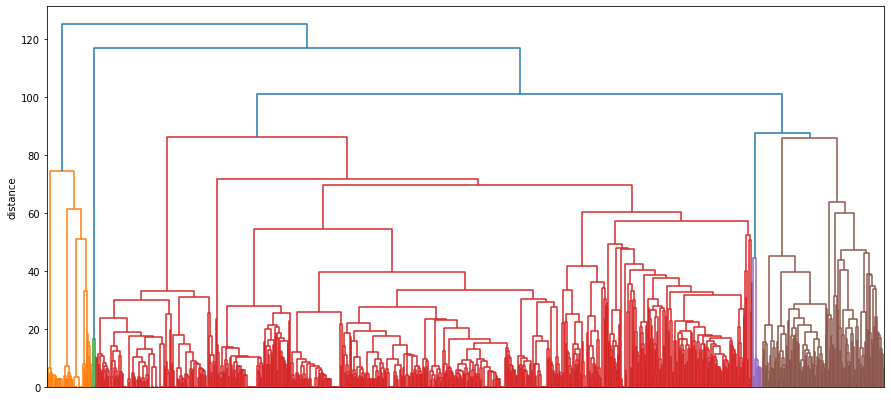

0.17310076567084784

In [9]:
# clusterisation en 7 clusters à partir de la matrice de fréquences
# par CAH et évaluation du résultat

Z_quarter = hierarchy.linkage(freq_matrix.toarray(), 'ward')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)

plt.show()

clusters = hierarchy.fcluster(Z_quarter, 7, criterion="maxclust")

metrics.adjusted_rand_score(clusters, data["category"])

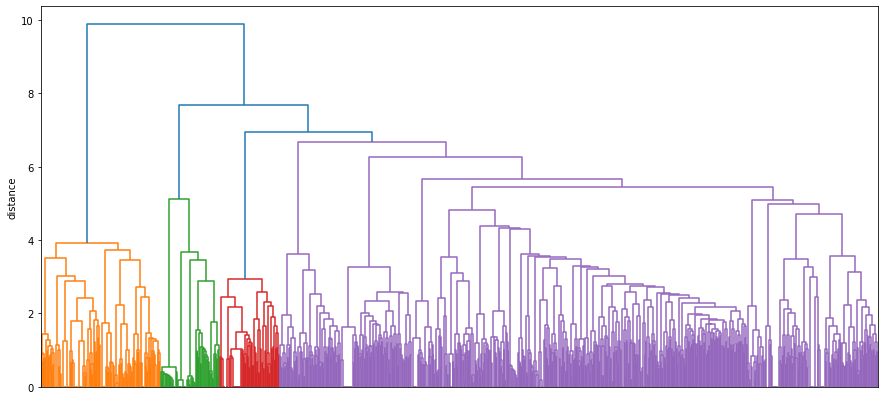

0.2563977910071799

In [10]:
# clusterisation en 7 clusters à partir de la matrice TfIdf
# par CAH et évaluation du résultat

Z_quarter = hierarchy.linkage(tfidf_matrix.toarray(), 'ward')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)

plt.show()

clusters = hierarchy.fcluster(Z_quarter, 7, criterion="maxclust")

metrics.adjusted_rand_score(clusters, data["category"])

In [11]:
# clusterisation en 7 clusters à partir de la matrice de fréquences
# par k_means et évaluation du résultat

km = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km.fit(freq_matrix)

metrics.adjusted_rand_score(km.labels_, data["category"])

0.12499456078510367

In [12]:
# clusterisation en 7 clusters à partir de la matrice TfIdf
# par k_means et évaluation du résultat

km = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km.fit(tfidf_matrix)

metrics.adjusted_rand_score(km.labels_, data["category"])

0.28657643899679563

In [13]:
# réduction de dimension

pca = decomposition.PCA(n_components=300)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

print(np.where(pca.explained_variance_ratio_.cumsum()>0.85))

(array([189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
       293, 294, 295, 296, 297, 298, 299]),)


In [14]:
# stockage des données réduites
reduced_data = reduced_data[:,:190]
reduced_data.shape

(1050, 190)

In [15]:
# clusterisation en 7 clusters à partir des données réduites
# par k_means et évaluation du résultat

km = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km.fit(reduced_data)

metrics.adjusted_rand_score(km.labels_, data["category"])

0.28297491676784975

In [16]:
# comparaison des deux clusterisations (CAH et k-means):

metrics.adjusted_rand_score(clusters, km.labels_)

0.5582305102113307

## Avec des bigrammes

In [17]:
# transformation des données en utilisant des bigrammes

tfidf_vectorizer_bigrams = feature_extraction.text.TfidfVectorizer(tokenizer=tokenizer,
                                                           max_df=0.8, 
                                                           max_features=5000, 
                                                           min_df=5, 
                                                           stop_words="english",
                                                           use_idf=True,
                                                           ngram_range=(2,2))
tfidf_bigrams_matrix = tfidf_vectorizer_bigrams.fit_transform(data["text"])

freq_vectorizer_bigrams = feature_extraction.text.CountVectorizer(tokenizer=tokenizer,
                                                           max_df=0.8, 
                                                           max_features=5000, 
                                                           min_df=5, 
                                                           stop_words="english",
                                                           ngram_range=(2,2))
freq_bigrams_matrix = freq_vectorizer_bigrams.fit_transform(data["text"])
tfidf_bigrams_matrix.shape

/home/samuel/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'le', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(1050, 1156)

In [18]:
# clusterisation en 7 clusters par CAH sur matrice de fréquences et évaluation du résultat

Z_quarter = hierarchy.linkage(freq_bigrams_matrix.toarray(), 'ward')

clusters = hierarchy.fcluster(Z_quarter, 7, criterion="maxclust")

metrics.adjusted_rand_score(clusters, data["category"])

0.05108171773871912

In [19]:
# clusterisation en 7 clusters par CAH sur TfIdf et évaluation du résultat

Z_quarter = hierarchy.linkage(tfidf_bigrams_matrix.toarray(), 'ward')

clusters = hierarchy.fcluster(Z_quarter, 7, criterion="maxclust")

metrics.adjusted_rand_score(clusters, data["category"])

0.18705314106240128

In [20]:
# clusterisation en 7 clusters par k-Means sur matrice de fréquence et évaluation du résultat

km_bigrams = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km_bigrams.fit(freq_bigrams_matrix)

metrics.adjusted_rand_score(km_bigrams.labels_, data["category"])

0.13662668454224727

In [21]:
# clusterisation en 7 clusters par k-Means sur TfIdf et évaluation du résultat

km_bigrams = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km_bigrams.fit(tfidf_bigrams_matrix)

metrics.adjusted_rand_score(km_bigrams.labels_, data["category"])

0.18427251106738884

In [22]:
# réduction de dimension

pca = decomposition.PCA(n_components=300)
reduced_data = pca.fit_transform(tfidf_bigrams_matrix.toarray())

print(np.where(pca.explained_variance_ratio_.cumsum()>0.85))

(array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 297, 298, 299]),)


In [23]:
# stockage des données réduites
reduced_data = reduced_data[:,:141]
reduced_data.shape

(1050, 141)

In [24]:
# clusterisation en 7 clusters à partir des données réduites
# par k_means et évaluation du résultat

km = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km.fit(reduced_data)

metrics.adjusted_rand_score(km.labels_, data["category"])

0.2534637527806636

# Visualisation

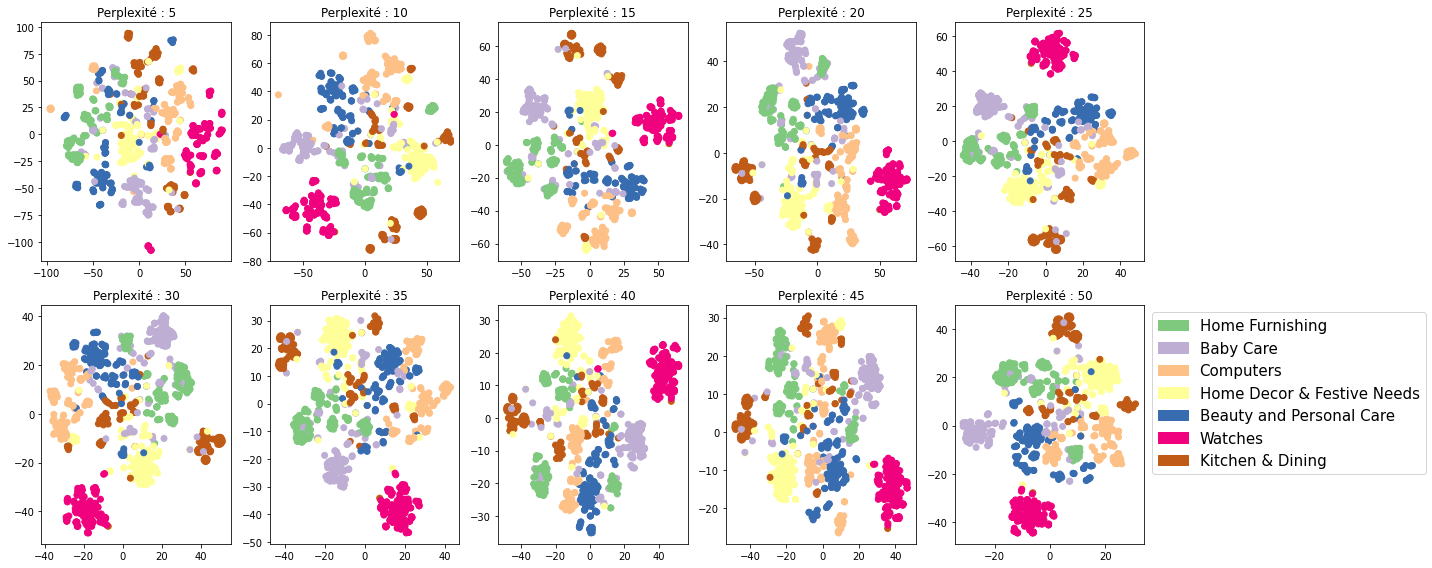

In [25]:
# visualisation par t-SNE
num_cat = preprocessing.LabelEncoder().fit_transform(data["category"])
dict_colors = {"Home Furnishing" : "#7fc97f",
               "Baby Care" : "#beaed4", 
               "Computers" : "#fdc086", 
               "Home Decor & Festive Needs" : "#ffff99", 
               "Beauty and Personal Care" : "#386cb0", 
               "Watches" : "#f0027f", 
               "Kitchen & Dining" : "#bf5b17"}
color_cat = data["category"].apply(lambda x : dict_colors[x])
fig, axes = plt.subplots(2, 5,figsize=(20,8))
axes = axes.ravel()
for i, ppx in enumerate(range(5,51,5)):
    tSNE = manifold.TSNE(n_components=2, perplexity=ppx)
    tsne_data = tSNE.fit_transform(tfidf_matrix.toarray(), num_cat)
    ax= axes[i]
    ax.scatter(tsne_data[:,0], tsne_data[:,1], c=color_cat)
    ax.set_title(f"Perplexité : {ppx}")
plt.legend([mpl.patches.Rectangle((0,0),2,4,color=col) for col in dict_colors.values()],
           dict_colors.keys(),
           fontsize = 15, bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig("img/tSNE.png", bbox_inches="tight")
plt.show()

# En changeant le nombre de clusters

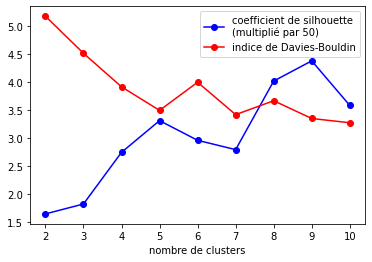

In [26]:
# optimisation du nombre de clusters du k-means par l'indice de Davies-Bouldin et le coefficient de silhouette

list_ind_db = list()
list_silh_score = list()
for nb_cl in range(2,11):
    km = cluster.KMeans(n_clusters=nb_cl, random_state=42)
    km.fit(tfidf_bigrams_matrix)
    list_ind_db.append(metrics.davies_bouldin_score(tfidf_matrix.toarray(), km.labels_))
    list_silh_score.append(metrics.silhouette_score(tfidf_matrix.toarray(), km.labels_))

plt.plot(range(2,11), np.array(list_silh_score)*50, marker='o', color="blue",
         label="coefficient de silhouette\n(multiplié par 50)")
plt.plot(range(2,11), list_ind_db, marker='o', color='r', label="indice de Davies-Bouldin")
plt.xlabel("nombre de clusters")
plt.legend()
plt.savefig("img/db_sil.png")

Les meilleures valeurs sont 5 et 9 clusters.  

In [27]:
# zoom sur 9 clusters

km_9 = cluster.KMeans(n_clusters=9, init="k-means++", random_state=42)
km_9.fit(tfidf_bigrams_matrix)
totals = pd.Series(km_9.labels_).value_counts()
print(totals)

for k in range(9):
    print(f"\nPremiers articles du cluster {k} parmi {totals[k]}:")
    print(raw_data.loc[np.where(km_9.labels_==k),"product_name"][:30])

7    339
3    183
0    137
1    120
6     82
5     77
2     62
8     29
4     21
dtype: int64

Premiers articles du cluster 0 parmi 137:
5      Maserati Time R8851116001 Analog Watch  - For ...
6      Camerii WM64 Elegance Analog Watch  - For Men,...
7      T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys
8      Alfajr WY16B Youth Digital Watch  - For Men, Boys
9      TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...
11        Cartier W6701005 Analog Watch  - For Boys, Men
12     Lois Caron LCS-4032 Analog Watch  - For Boys, Men
13          Titan 1639SL03 Analog Watch  - For Boys, Men
14     Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...
15     Escort E-1700-906_Blk Analog Watch  - For Men,...
16         Jack klein BlackLed Digital Watch  - For Boys
17     North Moon IW-005-FK Silicone Ion Digital Watc...
18      Franck Bella FB74C Analog Watch  - For Boys, Men
19     Ridas Apl_led_black Apple Shape Digital Watch ...
20     Skmei AD1057-Dark-Orange Sports Analog-Digital...
21      

In [28]:
# zoom sur 5 clusters

km_5 = cluster.KMeans(n_clusters=5, init="k-means++", random_state=42)
km_5.fit(tfidf_bigrams_matrix)
totals = pd.Series(km_5.labels_).value_counts()
print(totals)

for k in range(5):
    print(f"\nPremiers articles du cluster {k} parmi {totals[k]}:")
    clus = raw_data.loc[np.where(km_5.labels_==k)]
    print(clus["product_name"][:30])
    for i in range(30):
        print(clus.iloc[i]["image"])
        print(clus.index[i])
        img = cv2.imread("data/Images/"+clus.iloc[i]["image"])
        cv2.imshow(f"Index : {clus.index[i]}", img)
        cv2.waitKey()
        cv2.destroyAllWindows()

0    582
4    147
2    137
3    111
1     73
dtype: int64

Premiers articles du cluster 0 parmi 582:
0     Elegance Polyester Multicolor Abstract Eyelet ...
1                            Sathiyas Cotton Bath Towel
2                   Eurospa Cotton Terry Face Towel Set
3     SANTOSH ROYAL FASHION Cotton Printed King size...
4     Jaipur Print Cotton Floral King sized Double B...
10    Calibro SW-125 Analog-Digital Watch  - For Men...
28    Vizion 8502-7PURPLE Sports Series Digital Watc...
33    SANTOSH ROYAL FASHION Cotton Embroidered Diwan...
34                  House This Queen Cotton Duvet Cover
36    Myesquire Ceramic Burner Pot Lemongrass Liquid...
37    Dungri India Craft Ducjug010-ducgl012-2 Jug Gl...
38                                     BFT 6 W LED Bulb
39                           JMD Printed Cushions Cover
40    Mom and Kid Baby Girl's Printed Green Top & Py...
41                       Kripa's Printed Cushions Cover
42    Mom and Kid Baby Girl's Printed Blue, Grey Top...
43 

5479bb7028827d60000720a2c135976a.jpg
16
733aa1e801a139fa8dc7be9f0eff5ee0.jpg
17
62c35de4df27437d3597963fac55a8b6.jpg
18
33d97d63c037078cd3f08033966d6a88.jpg
19
d7ca2b06b4f4d3b98c61c377b18a2d6b.jpg
20
f74476ba64365d97a5be7d375cbf4c7a.jpg
21
fda50982a672ef8835de5c1cc86f8bfc.jpg
22
4788f5466992da09024b8ffcc8a5cba4.jpg
23
653826cd53f1d9e2c086c0ac7846ef70.jpg
24
3c74db45cbfc14a78b8466dca494b3bb.jpg
25
4aa047f14885c74f155ce5f973e14dff.jpg
26
7c4fec2331da8d40f2cb146eb198cb57.jpg
27
ee8d9ff65e0fe4278afce7c933d30941.jpg
29
788dc3a3da91c0f46a7c465e07f91dd4.jpg
30
29b1ca231e10d5269516b80bf9d0dffc.jpg
31
8b268c1e68f198ae2e934717d49f48e9.jpg
32
a124d6e4c30b00918c594289266a383c.jpg
494
40efb9474b44fba54b5d2a8df121d727.jpg
495
087e83a2406dc98d941b8555356da477.jpg
496
75015382e469d36e397c5b47ea613314.jpg
497

Premiers articles du cluster 3 parmi 111:
89                  Parv Collections Showpiece  -  12 cm
90     Exotic India Adi Buddha Vajrasattva Showpiece ...
91     Aapno Rajasthan Princess Design 

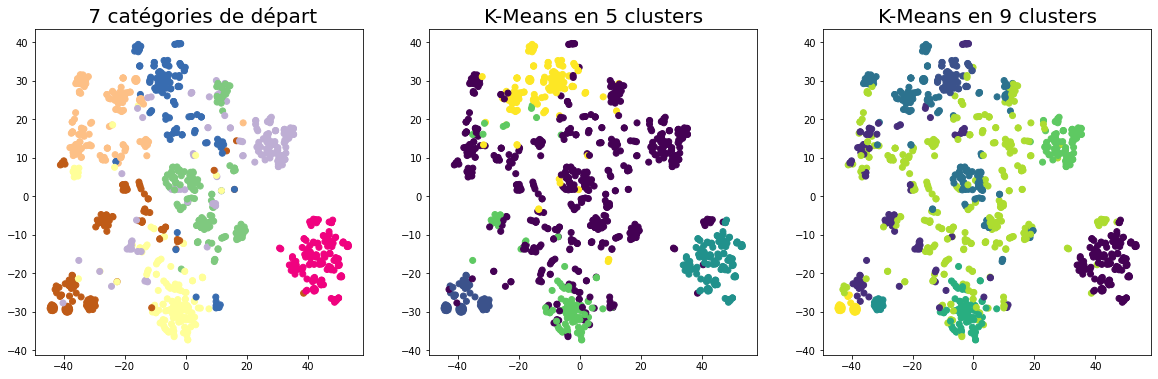

In [29]:
# visualisation des clusterings en 3 et 9 clusters et comparaison avec la classification de départ

tSNE = manifold.TSNE(n_components=2, perplexity=30)
tsne_data = tSNE.fit_transform(tfidf_matrix.toarray(), num_cat)
fig, axes = plt.subplots(1, 3,figsize=(20,6))
axes[0].scatter(tsne_data[:,0], tsne_data[:,1], c=color_cat)
axes[0].set_title(" 7 catégories de départ", fontsize=20)
axes[1].scatter(tsne_data[:,0], tsne_data[:,1], c=km_5.labels_)
axes[1].set_title("K-Means en 5 clusters", fontsize=20)
axes[2].scatter(tsne_data[:,0], tsne_data[:,1], c=km_9.labels_)
axes[2].set_title("K-Means en 9 clusters", fontsize=20)
plt.savefig("img/comparaison_nb_clusters.png")
plt.show()

# En utilisant des vecteurs denses (USE)

In [30]:
import tensorflow as tf
import tensorflow_hub as hub
# get the last version of the encoder from google
encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
# encode each product_name
tf_tensor = encoder(data['text'].values)
# put in a dataframe 
df_USE = pd.DataFrame(tf.make_ndarray(tf.make_tensor_proto(tf_tensor)),
                            index=data.index,
                            columns=['dim_'+str(i) for i in range(512)])

In [31]:
df_USE

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_502,dim_503,dim_504,dim_505,dim_506,dim_507,dim_508,dim_509,dim_510,dim_511
0,-0.055802,-0.020621,0.015289,0.045675,0.026945,0.051764,-0.050865,0.057350,-0.026430,-0.004027,...,-0.049144,-0.058987,-0.054304,0.050261,-0.008208,-0.045925,0.027167,0.052431,0.046384,-0.018056
1,-0.051246,-0.021884,0.025971,0.026926,0.056731,0.059367,0.056201,-0.026984,-0.048458,-0.044295,...,0.036341,-0.059178,-0.056070,-0.056444,-0.029976,-0.053365,-0.017411,0.030718,0.029618,0.024636
2,-0.057513,0.023669,-0.042719,0.054274,0.055588,0.057130,0.051119,0.042892,-0.024742,0.012096,...,0.054410,-0.057671,-0.051719,0.002889,0.018610,-0.044411,0.040695,0.057231,-0.050763,-0.049427
3,-0.055037,-0.052953,0.044318,0.052961,0.054975,0.046572,0.019495,0.032417,-0.013021,-0.050903,...,-0.018259,-0.055173,-0.009978,0.036652,-0.051785,-0.039378,0.052129,0.053067,-0.034363,-0.054562
4,-0.054537,-0.038785,0.041698,0.049175,0.054529,0.052913,-0.030085,0.049432,0.033092,-0.050002,...,0.004565,-0.054651,-0.050683,-0.013540,-0.054276,-0.042897,0.054270,0.054582,-0.026775,-0.053085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.057571,0.041674,-0.021002,0.016566,0.034114,0.012930,-0.041122,0.048138,-0.059826,0.057330,...,-0.059389,-0.061793,-0.033447,0.060499,-0.061328,0.053784,-0.011500,0.054052,-0.053548,-0.047392
1046,-0.066059,-0.026474,0.005652,0.062990,0.046531,0.024230,-0.032388,0.062571,-0.041753,0.040256,...,-0.022196,-0.066805,-0.023065,0.035997,-0.037095,0.023630,0.003055,0.050256,-0.011210,-0.038431
1047,-0.036324,-0.027668,0.030065,0.015082,-0.031849,0.057735,-0.071027,0.005270,-0.055509,-0.060429,...,0.003627,-0.069704,-0.047844,0.047687,-0.065780,-0.026242,0.066039,-0.001040,0.070254,-0.067864
1048,-0.035890,-0.037598,0.055523,0.049320,0.028158,0.044547,-0.067355,0.034093,-0.012341,-0.066884,...,0.052618,-0.054905,-0.057522,0.046797,-0.064493,-0.048773,0.010453,0.039387,-0.021597,-0.046010


In [32]:
# clusterisation en 7 clusters par k_means et évaluation du résultat

km = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km.fit(df_USE)

metrics.adjusted_rand_score(km.labels_, data["category"])

0.3343066572205401

In [33]:
# réduction de dimension

pca = decomposition.PCA(n_components=300)
reduced_data = pca.fit_transform(df_USE)

print(np.where(pca.explained_variance_ratio_.cumsum()>0.85))

(array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 2

In [34]:
# stockage des données réduites
reduced_data = reduced_data[:,:98]
reduced_data.shape

(1050, 98)

In [35]:
# clusterisation en 7 clusters à partir des données réduites
# par k_means et évaluation du résultat

km = cluster.KMeans(n_clusters=7, init= "k-means++", random_state=42)
km.fit(reduced_data)

metrics.adjusted_rand_score(km.labels_, data["category"])

0.3316221420974923

# Sauvegarde des données

In [37]:
data.to_csv("data/data.csv")